In [82]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import pymc3 as pm
import arviz as az

sns.set()


In [83]:
dick = pd.read_pickle('country_data.pkl')
world_df = pd.read_pickle('global_data.pkl')

swe = dick['Sweden']
swe


,confirmed,factor,inc,deceased,dead_factor,dead_inc,pct_dead,conf_over_dead,dead_conf_ratio
2020-01-24,0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN
2020-01-25,0,NaN,0.0,0,NaN,0.0,NaN,NaN,NaN
2020-01-26,0,NaN,0.0,0,NaN,0.0,NaN,NaN,NaN
2020-01-27,0,NaN,0.0,0,NaN,0.0,NaN,NaN,NaN
2020-01-28,0,NaN,0.0,0,NaN,0.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2020-08-10,82972,1.007884,649.0,5766,1.000521,3.0,6.949332,14.389872,0.992695
2020-08-11,83126,1.001856,154.0,5770,1.000694,4.0,6.941270,14.406586,0.998840
2020-08-12,83455,1.003958,329.0,5774,1.000693,4.0,6.918699,14.453585,0.996748
2020-08-13,83852,1.004757,397.0,5776,1.000346,2.0,6.888327,14.517313,0.995610


In [84]:
# fix erroneous data
esp = dick['Spain']
print (esp.loc['2020-04-24'])
esp.at['2020-04-24','inc'] = 1 # poisson cant deal with negative numbers
dick['Spain'] = esp

uk = dick['United Kingdom']
uk.at['2020-05-20','inc'] = 1
dick['United Kingdom'] = uk

confirmed          202990.000000
factor                  0.952897
inc                -10034.000000
deceased            22524.000000
dead_factor             1.016564
dead_inc              367.000000
pct_dead               11.096113
conf_over_dead          9.012165
dead_conf_ratio         1.066813
Name: 2020-04-24 00:00:00, dtype: float64


In [85]:
US = pd.read_pickle('us_state_dict.pkl')
ny = US['New York']
ny = ny[['confirmed','deceased','inc','factor','dead_inc','dead_factor','pct_dead']]
dick['New York'] = ny
ny

,confirmed,deceased,inc,factor,dead_inc,dead_factor,pct_dead
2020-03-14,525.0,2.0,104.0,1.247031,2.0,NaN,0.380952
2020-03-15,732.0,3.0,207.0,1.394286,1.0,1.500000,0.409836
2020-03-16,967.0,10.0,235.0,1.321038,7.0,3.333333,1.034126
2020-03-17,1706.0,13.0,739.0,1.764219,3.0,1.300000,0.762016
2020-03-18,2495.0,16.0,789.0,1.462485,3.0,1.230769,0.641283
...,...,...,...,...,...,...,...
2020-06-16,384575.0,30909.0,-8828.0,0.977560,-494.0,0.984269,8.037184
2020-04-14,203020.0,10842.0,-181555.0,0.527907,-20067.0,0.350772,5.340361
2020-06-08,378799.0,30417.0,175779.0,1.865821,19575.0,2.805479,8.029852
2020-07-31,415014.0,32689.0,36215.0,1.095605,2272.0,1.074695,7.876602


++++++++ US ++++++++++

            confirmed    factor      inc  deceased  dead_factor  dead_inc  \
2020-07-06    2936077  1.015549  44953.0    130670     1.002693     351.0   
2020-07-07    2996098  1.020443  60021.0    131894     1.009367    1224.0   
2020-07-08    3054699  1.019559  58601.0    132744     1.006445     850.0   
2020-07-09    3117946  1.020705  63247.0    133756     1.007624    1012.0   
2020-07-10    3185737  1.021742  67791.0    134586     1.006205     830.0   
2020-07-11    3245925  1.018893  60188.0    135277     1.005134     691.0   
2020-07-12    3304942  1.018182  59017.0    135728     1.003334     451.0   
2020-07-13    3364157  1.017917  59215.0    136117     1.002866     389.0   
2020-07-14    3431574  1.020040  67417.0    137045     1.006818     928.0   
2020-07-15    3498902  1.019620  67328.0    138013     1.007063     968.0   
2020-07-16    3576157  1.022080  77255.0    138966     1.006905     953.0   
2020-07-17    3647715  1.020010  71558.0    139886  

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [F, M, M_beta, M_alpha, F_sigma, F_mu]


Sampling 2 chains for 5_000 tune and 5_000 draw iterations (10_000 + 10_000 draws total) took 1221 seconds.
The chain reached the maximum tree depth. Increase max_treedepth, increase target_accept or reparameterize.
There were 1660 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.5533154370171872, but should be close to 0.8. Try to increase the number of tuning steps.
The rhat statistic is larger than 1.4 for some parameters. The sampler did not converge.
The estimated number of effective samples is smaller than 200 for some parameters.
/usr/local/lib/python3.8/site-packages/arviz/data/io_pymc3.py:85: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(
/usr/local/lib/python3.8/site-packages/arviz/dat

           mean      sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_mean  \
F_mu       2.08    0.57    1.10     3.14       0.01     0.01   1786.97   
F_sigma    0.31    0.24    0.11     0.81       0.13     0.10      3.33   
M_alpha    3.72    2.06    1.00     8.11       0.83     0.61      6.23   
M_beta   716.40  112.41  570.85   998.43      36.07    28.35      9.71   
M          0.00    0.00    0.00     0.01       0.00     0.00     50.71   
F          9.24   10.92    1.46    19.53       0.29     0.21   1414.78   

          ess_sd  ess_bulk  ess_tail  r_hat  
F_mu      838.41    231.66     65.90   1.52  
F_sigma     3.33      3.16     55.37   1.77  
M_alpha     6.23      7.16     51.94   1.45  
M_beta      8.45     26.45     52.99   1.59  
M          22.24    118.76     63.08   1.52  
F        1414.78    119.00     62.65   1.51  

       M_alpha_post   M_beta_post     F_mu_post  F_sigma_post        M_post  \
count  10000.000000  10000.000000  10000.000000  10000.000000  10000.000000   


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [F, M, M_beta, M_alpha, F_sigma, F_mu]


Sampling 2 chains for 5_000 tune and 5_000 draw iterations (10_000 + 10_000 draws total) took 126 seconds.
There were 1569 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.48034723327440815, but should be close to 0.8. Try to increase the number of tuning steps.
There were 1958 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.5350889621754573, but should be close to 0.8. Try to increase the number of tuning steps.
The rhat statistic is larger than 1.4 for some parameters. The sampler did not converge.
The estimated number of effective samples is smaller than 200 for some parameters.
/usr/local/lib/python3.8/site-packages/arviz/data/io_pymc3.py:85: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you u

           mean      sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_mean  \
F_mu       3.17    0.61    2.07     4.05       0.24     0.18      6.23   
F_sigma    0.57    0.16    0.28     0.83       0.07     0.05      5.90   
M_alpha    2.82    1.09    1.39     5.15       0.45     0.34      5.78   
M_beta   822.05  155.60  572.00   996.14      89.62    71.61      3.01   
M          0.00    0.00    0.00     0.01       0.00     0.00      3.82   
F         31.01   12.77   10.89    52.96       7.08     5.54      3.25   

         ess_sd  ess_bulk  ess_tail  r_hat  
F_mu       6.23      6.45     25.95   1.24  
F_sigma    5.90      7.69     15.35   1.20  
M_alpha    5.78      6.02     45.11   1.26  
M_beta     2.96      2.83     12.80   1.90  
M          3.82      3.54     34.66   1.59  
F          3.25      3.54     33.72   1.59  

       M_alpha_post   M_beta_post     F_mu_post  F_sigma_post        M_post  \
count  10000.000000  10000.000000  10000.000000  10000.000000  10000.000000   
mean   

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [F, M, M_beta, M_alpha, F_sigma, F_mu]


Sampling 2 chains for 5_000 tune and 5_000 draw iterations (10_000 + 10_000 draws total) took 809 seconds.
The number of effective samples is smaller than 25% for some parameters.
/usr/local/lib/python3.8/site-packages/arviz/data/io_pymc3.py:85: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(
/usr/local/lib/python3.8/site-packages/arviz/data/io_pymc3.py:85: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


           mean      sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_mean  \
F_mu       2.00    0.75    1.10     3.40       0.02     0.01   2289.62   
F_sigma    0.51    0.23    0.11     0.86       0.00     0.00   4417.40   
M_alpha    4.14    2.30    1.00     8.48       0.04     0.03   3211.47   
M_beta   776.09  141.57  543.38   999.92       1.91     1.35   5502.54   
M          0.00    0.00    0.00     0.01       0.00     0.00   2810.62   
F          9.03   12.93    0.96    24.24       0.28     0.20   2172.08   

          ess_sd  ess_bulk  ess_tail  r_hat  
F_mu     2212.22   2447.03   2797.20    1.0  
F_sigma  4318.93   4328.75   4137.73    1.0  
M_alpha  3211.47   2975.32   4431.19    1.0  
M_beta   5502.54   5100.28   4219.86    1.0  
M        2810.62   2255.93   2414.14    1.0  
F        2172.08   2255.02   2409.63    1.0  

       M_alpha_post   M_beta_post     F_mu_post  F_sigma_post        M_post  \
count  10000.000000  10000.000000  10000.000000  10000.000000  10000.000000   


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [F, M, M_beta, M_alpha, F_sigma, F_mu]


Sampling 2 chains for 5_000 tune and 5_000 draw iterations (10_000 + 10_000 draws total) took 299 seconds.
The number of effective samples is smaller than 25% for some parameters.
/usr/local/lib/python3.8/site-packages/arviz/data/io_pymc3.py:85: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(
/usr/local/lib/python3.8/site-packages/arviz/data/io_pymc3.py:85: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


           mean      sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_mean  \
F_mu       2.25    0.82    1.10     3.76       0.02     0.01   1906.82   
F_sigma    0.49    0.23    0.10     0.85       0.00     0.00   5259.43   
M_alpha    5.16    2.51    1.01     9.30       0.05     0.04   2403.07   
M_beta   762.16  143.29  537.79   999.47       1.86     1.32   5956.42   
M          0.01    0.00    0.00     0.01       0.00     0.00   2084.09   
F         12.70   17.27    1.74    35.06       0.42     0.30   1651.76   

          ess_sd  ess_bulk  ess_tail  r_hat  
F_mu     1829.83   2001.04   2374.46    1.0  
F_sigma  5131.81   4963.43   4531.96    1.0  
M_alpha  2403.07   2308.69   3516.87    1.0  
M_beta   5926.94   5560.27   4913.29    1.0  
M        2084.09   1828.17   1983.86    1.0  
F        1651.76   1829.24   1975.45    1.0  

       M_alpha_post   M_beta_post     F_mu_post  F_sigma_post        M_post  \
count  10000.000000  10000.000000  10000.000000  10000.000000  10000.000000   


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [F, M, M_beta, M_alpha, F_sigma, F_mu]


Sampling 2 chains for 5_000 tune and 5_000 draw iterations (10_000 + 10_000 draws total) took 580 seconds.
There were 1630 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.5514687600241799, but should be close to 0.8. Try to increase the number of tuning steps.
The rhat statistic is larger than 1.4 for some parameters. The sampler did not converge.
The estimated number of effective samples is smaller than 200 for some parameters.
/usr/local/lib/python3.8/site-packages/arviz/data/io_pymc3.py:85: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(
/usr/local/lib/python3.8/site-packages/arviz/data/io_pymc3.py:85: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release.

           mean      sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_mean  \
F_mu       2.92    0.65    1.81     4.51       0.19     0.15     12.34   
F_sigma    0.31    0.25    0.10     0.81       0.14     0.11      3.12   
M_alpha    6.77    2.15    2.34     9.98       0.85     0.63      6.36   
M_beta   756.81  110.81  509.51   943.50      25.82    18.55     18.42   
M          0.01    0.00    0.00     0.01       0.00     0.00     14.75   
F         23.72   25.61    5.17    63.54       6.44     4.64     15.83   

         ess_sd  ess_bulk  ess_tail  r_hat  
F_mu      10.20     20.69     54.55   1.45  
F_sigma    3.12      2.98     27.54   1.79  
M_alpha    6.36     12.41     54.94   1.39  
M_beta    18.42     17.99     52.77   1.20  
M         14.75     13.84     53.46   1.33  
F         15.83     13.82     53.69   1.36  

       M_alpha_post   M_beta_post     F_mu_post  F_sigma_post        M_post  \
count  10000.000000  10000.000000  10000.000000  10000.000000  10000.000000   
mean   

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [F, M, M_beta, M_alpha, F_sigma, F_mu]


Sampling 2 chains for 5_000 tune and 5_000 draw iterations (10_000 + 10_000 draws total) took 544 seconds.
There were 1891 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.424840482484743, but should be close to 0.8. Try to increase the number of tuning steps.
The rhat statistic is larger than 1.4 for some parameters. The sampler did not converge.
The estimated number of effective samples is smaller than 200 for some parameters.
/usr/local/lib/python3.8/site-packages/arviz/data/io_pymc3.py:85: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(
/usr/local/lib/python3.8/site-packages/arviz/data/io_pymc3.py:85: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. 

           mean      sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_mean  \
F_mu       2.78    0.67    1.84     4.44       0.24     0.18      7.65   
F_sigma    0.56    0.18    0.12     0.80       0.06     0.04      9.69   
M_alpha    5.79    1.87    2.37     9.99       0.13     0.10    199.49   
M_beta   750.49  105.54  501.75   939.44       5.30     4.34    396.12   
M          0.01    0.00    0.00     0.01       0.00     0.00     44.75   
F         22.02   20.55    5.57    55.58       5.10     3.68     16.21   

         ess_sd  ess_bulk  ess_tail  r_hat  
F_mu       7.44      8.32     50.67   1.36  
F_sigma    9.69     21.61     52.60   1.31  
M_alpha  166.46     63.43     48.26   1.30  
M_beta   296.04     61.21     58.60   1.40  
M         44.75     36.34     51.35   1.54  
F         16.21     36.49     48.11   1.56  

       M_alpha_post   M_beta_post     F_mu_post  F_sigma_post        M_post  \
count  10000.000000  10000.000000  10000.000000  10000.000000  10000.000000   
mean   

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [F, M, M_beta, M_alpha, F_sigma, F_mu]


Sampling 2 chains for 5_000 tune and 5_000 draw iterations (10_000 + 10_000 draws total) took 1351 seconds.
The chain reached the maximum tree depth. Increase max_treedepth, increase target_accept or reparameterize.
The chain reached the maximum tree depth. Increase max_treedepth, increase target_accept or reparameterize.
The number of effective samples is smaller than 25% for some parameters.
/usr/local/lib/python3.8/site-packages/arviz/data/io_pymc3.py:85: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(
/usr/local/lib/python3.8/site-packages/arviz/data/io_pymc3.py:85: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call fro

           mean      sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_mean  \
F_mu       2.70    0.84    1.15     4.19       0.02     0.02   1379.59   
F_sigma    0.49    0.23    0.11     0.86       0.00     0.00   3611.71   
M_alpha    5.53    2.55    1.54     9.86       0.06     0.04   1824.22   
M_beta   747.46  145.21  500.03   971.50       2.34     1.65   3858.15   
M          0.01    0.00    0.00     0.02       0.00     0.00   1504.87   
F         20.55   24.05    2.64    57.22       0.63     0.44   1479.77   

          ess_sd  ess_bulk  ess_tail  r_hat  
F_mu     1336.92   1408.41   2202.01    1.0  
F_sigma  3519.85   3441.20   3584.89    1.0  
M_alpha  1824.22   1799.50   2568.14    1.0  
M_beta   3858.15   3408.28   3164.54    1.0  
M        1504.87   1336.99   2110.99    1.0  
F        1479.77   1337.16   2110.99    1.0  

       M_alpha_post   M_beta_post     F_mu_post  F_sigma_post        M_post  \
count  10000.000000  10000.000000  10000.000000  10000.000000  10000.000000   


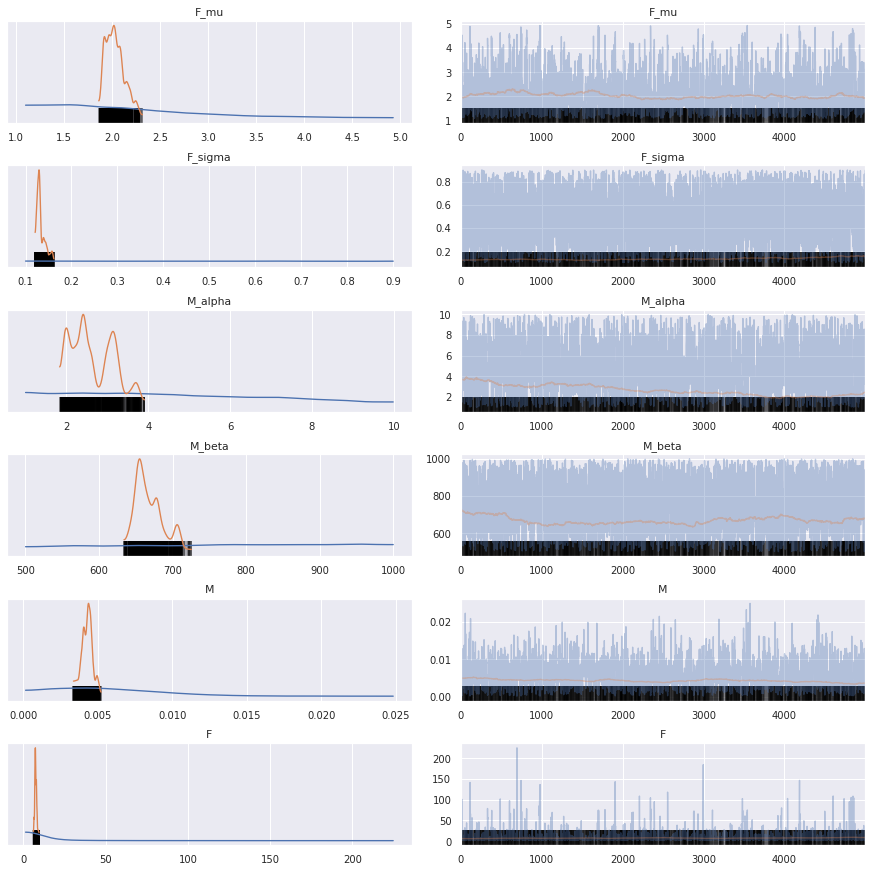

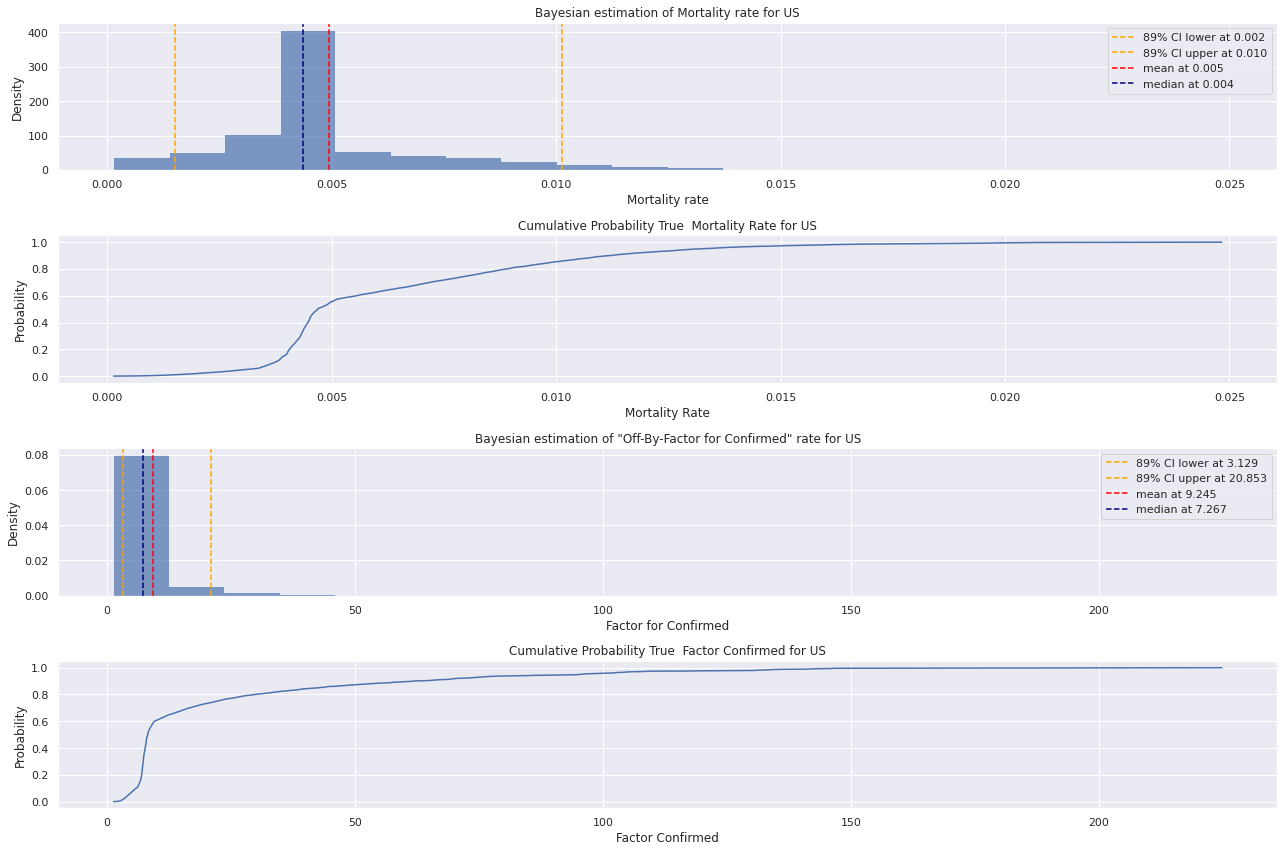

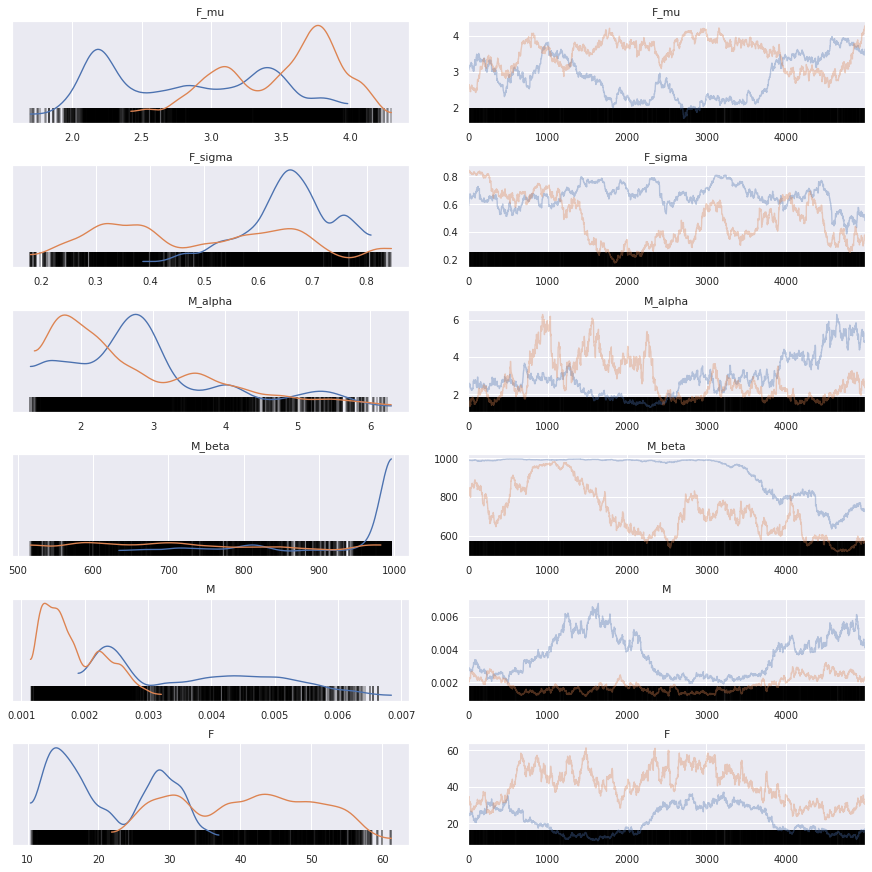

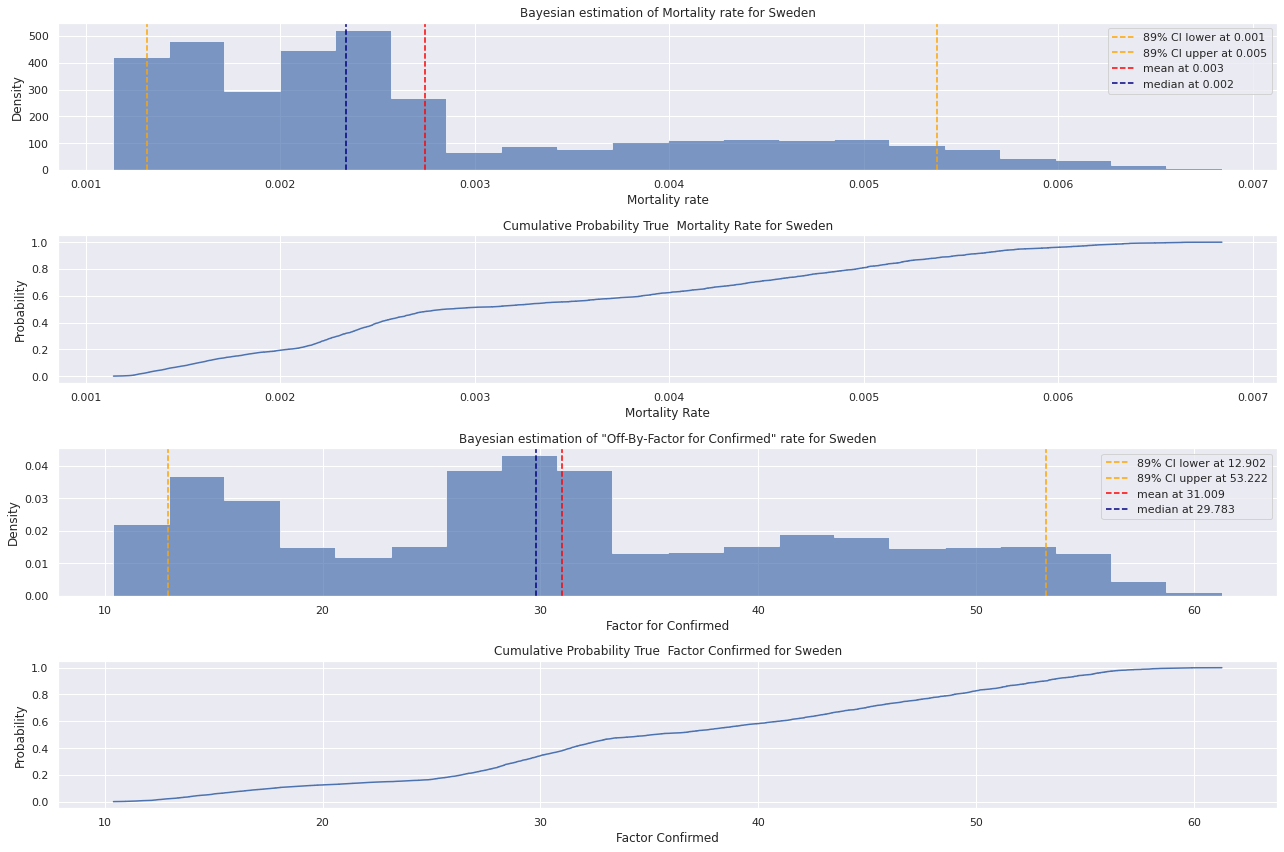

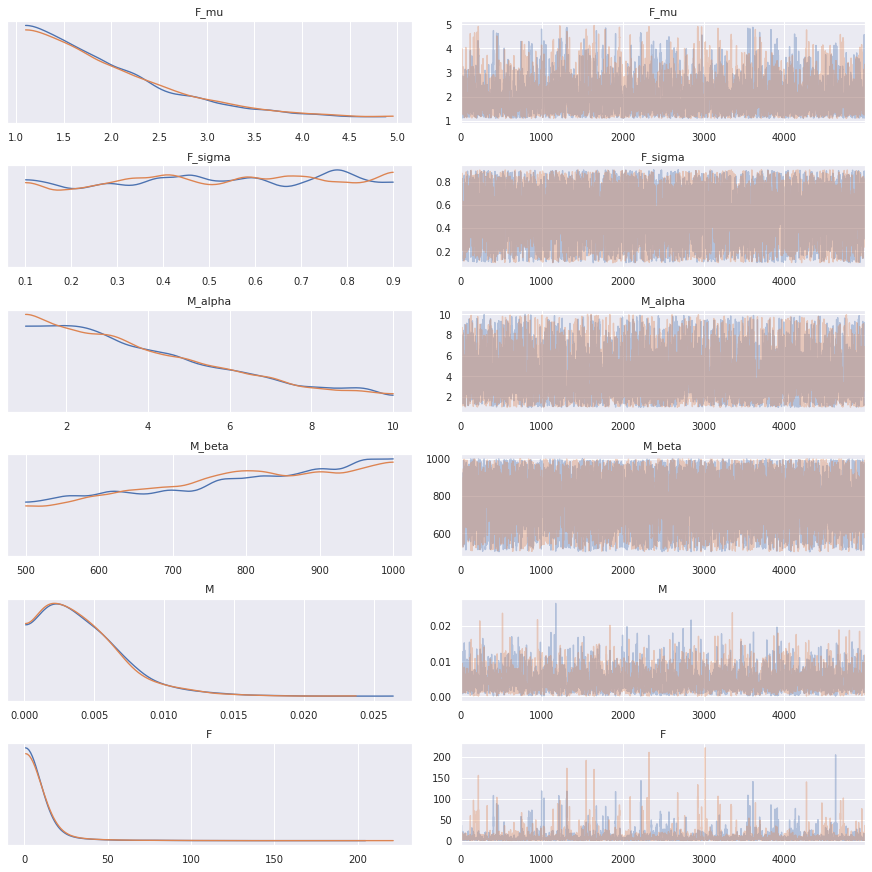

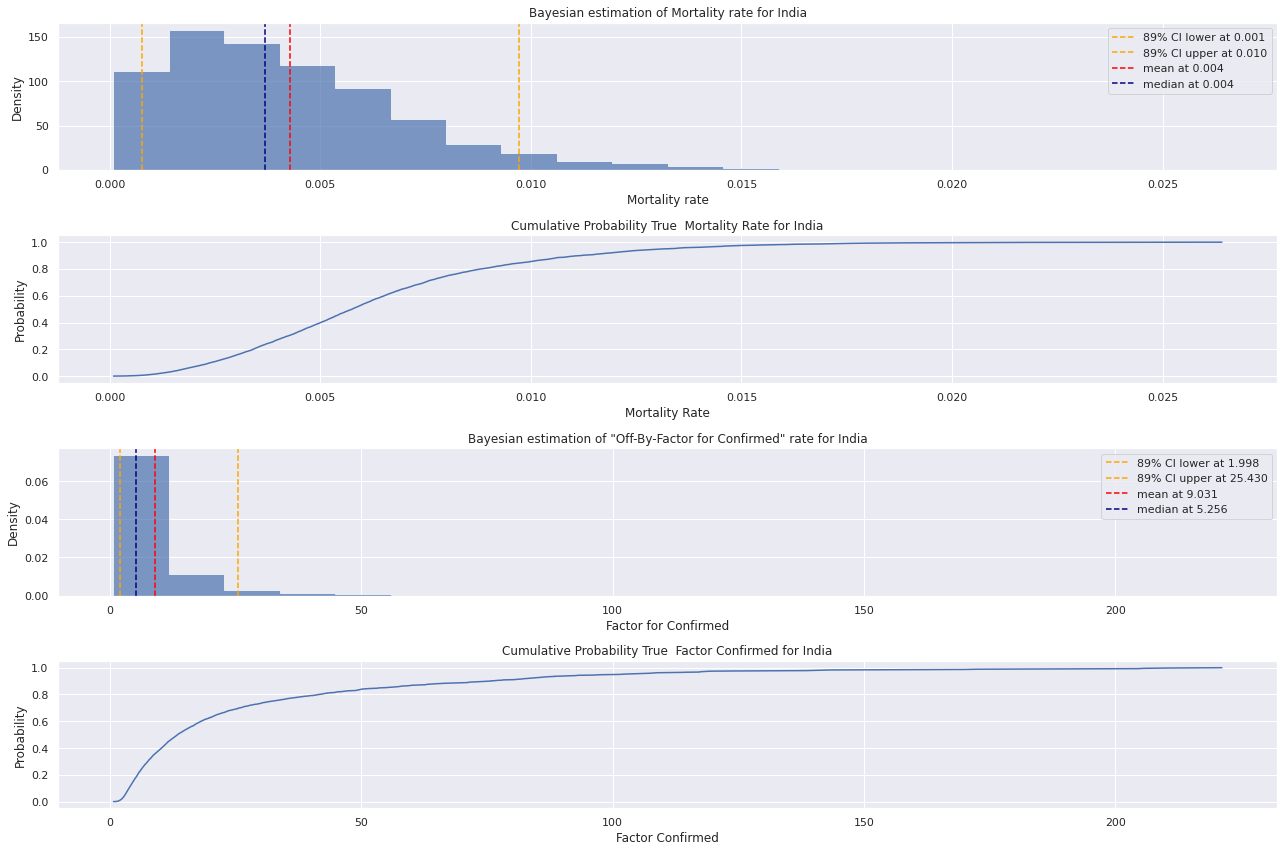

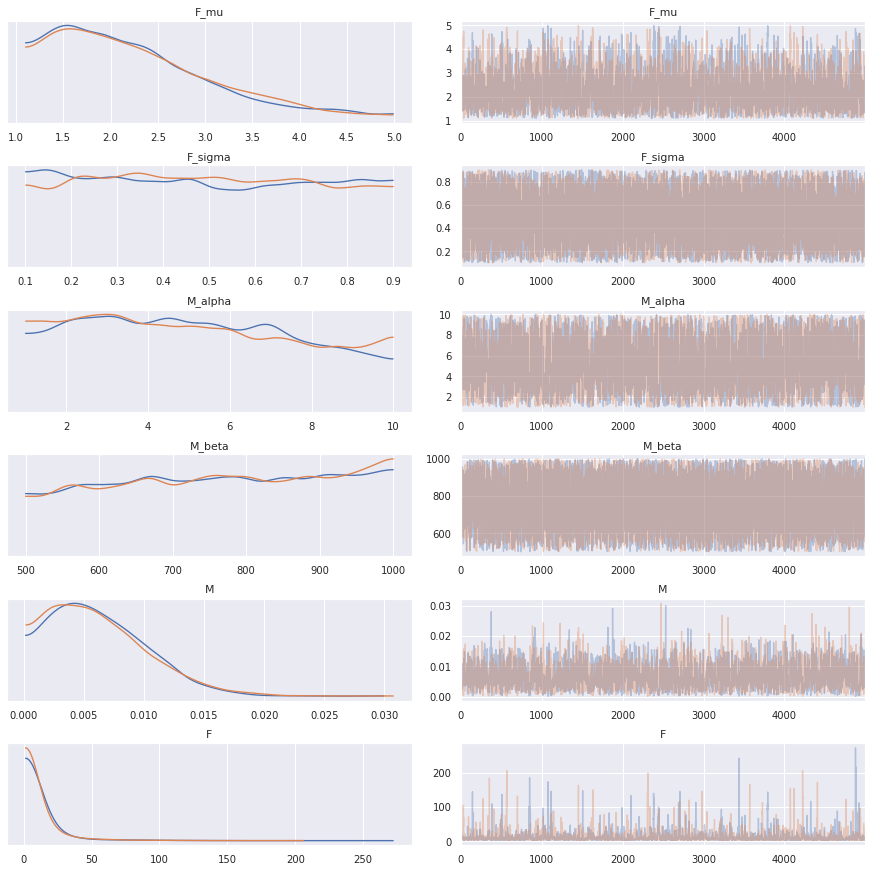

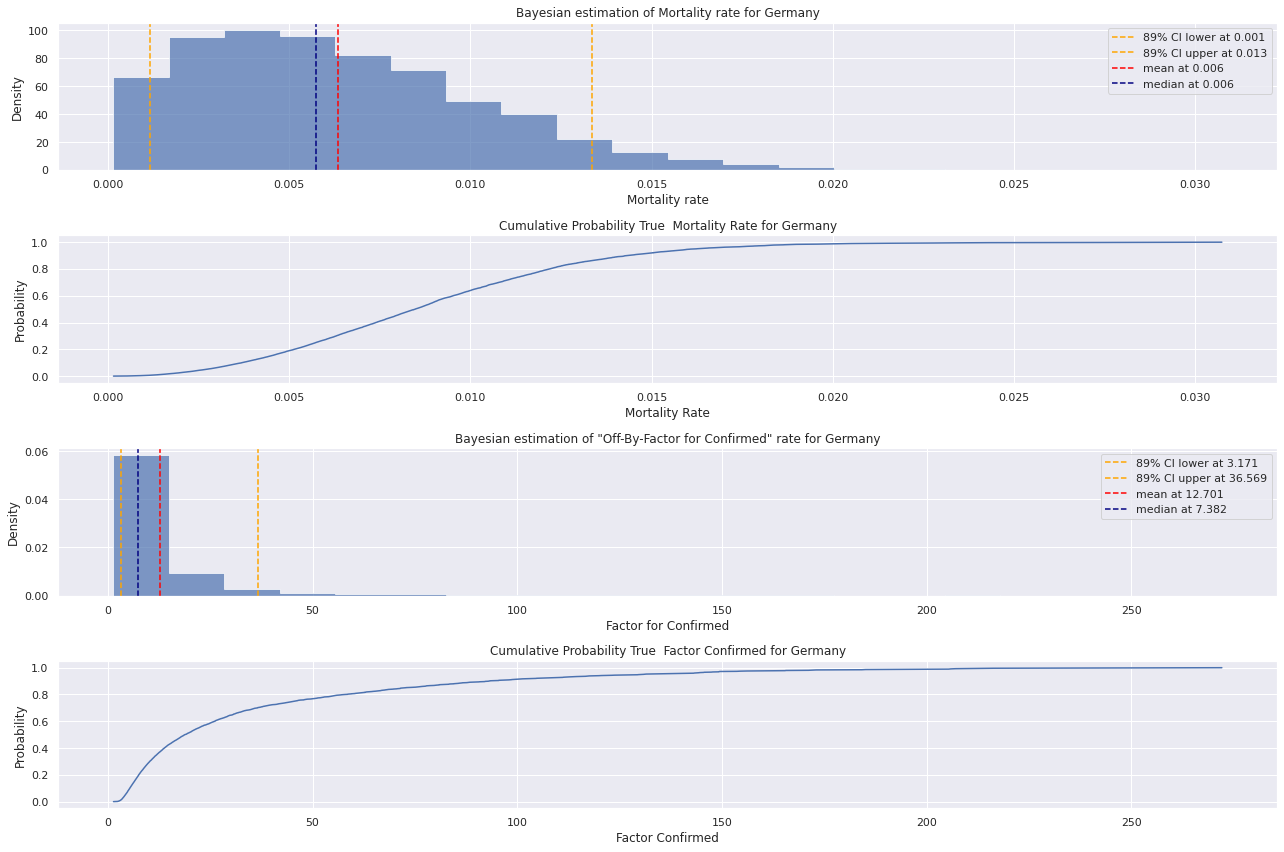

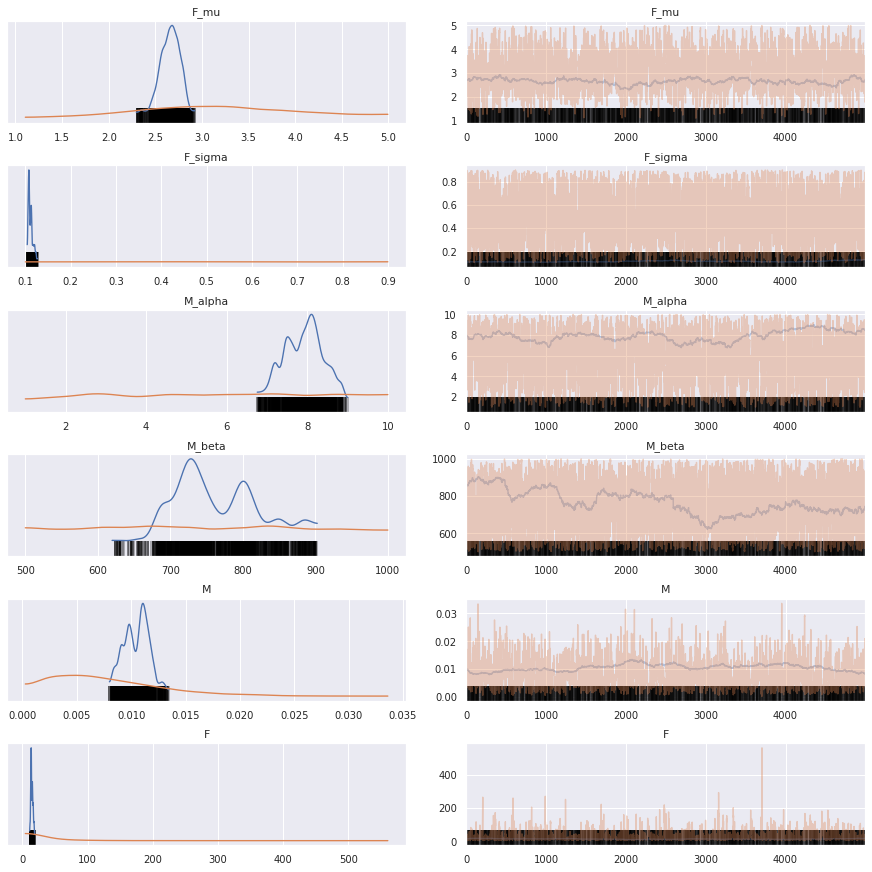

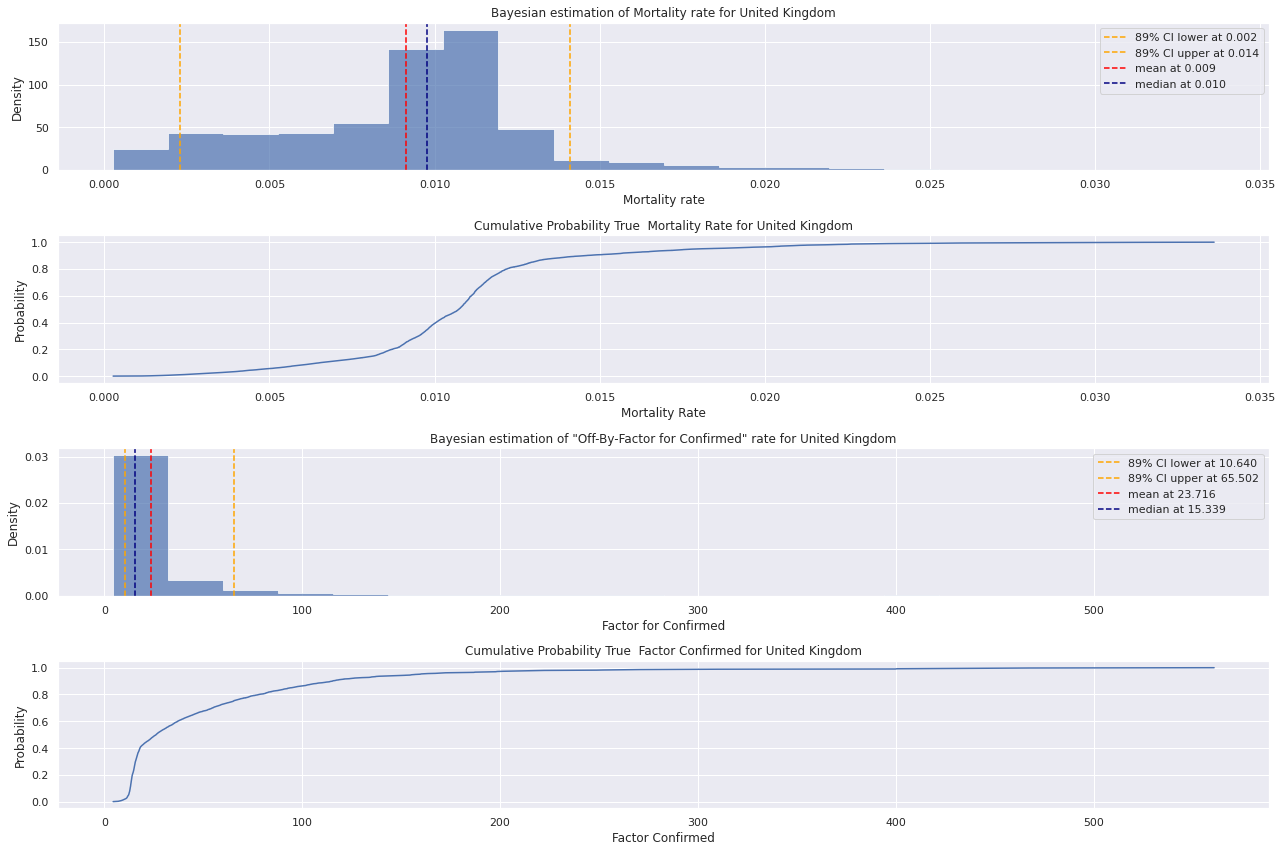

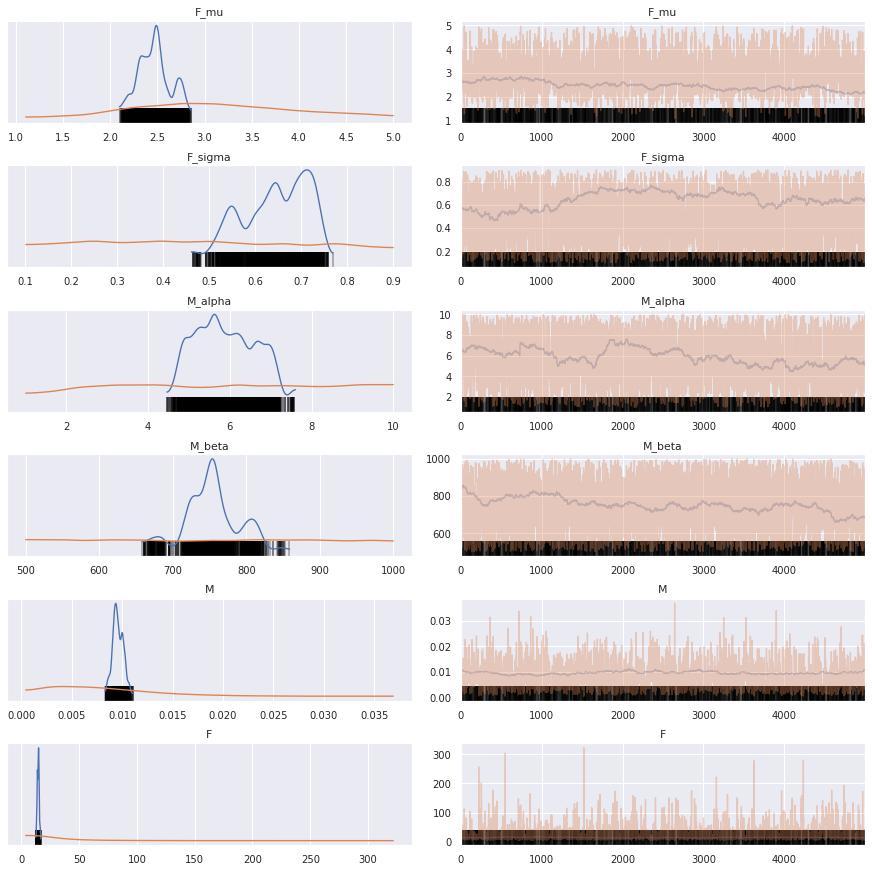

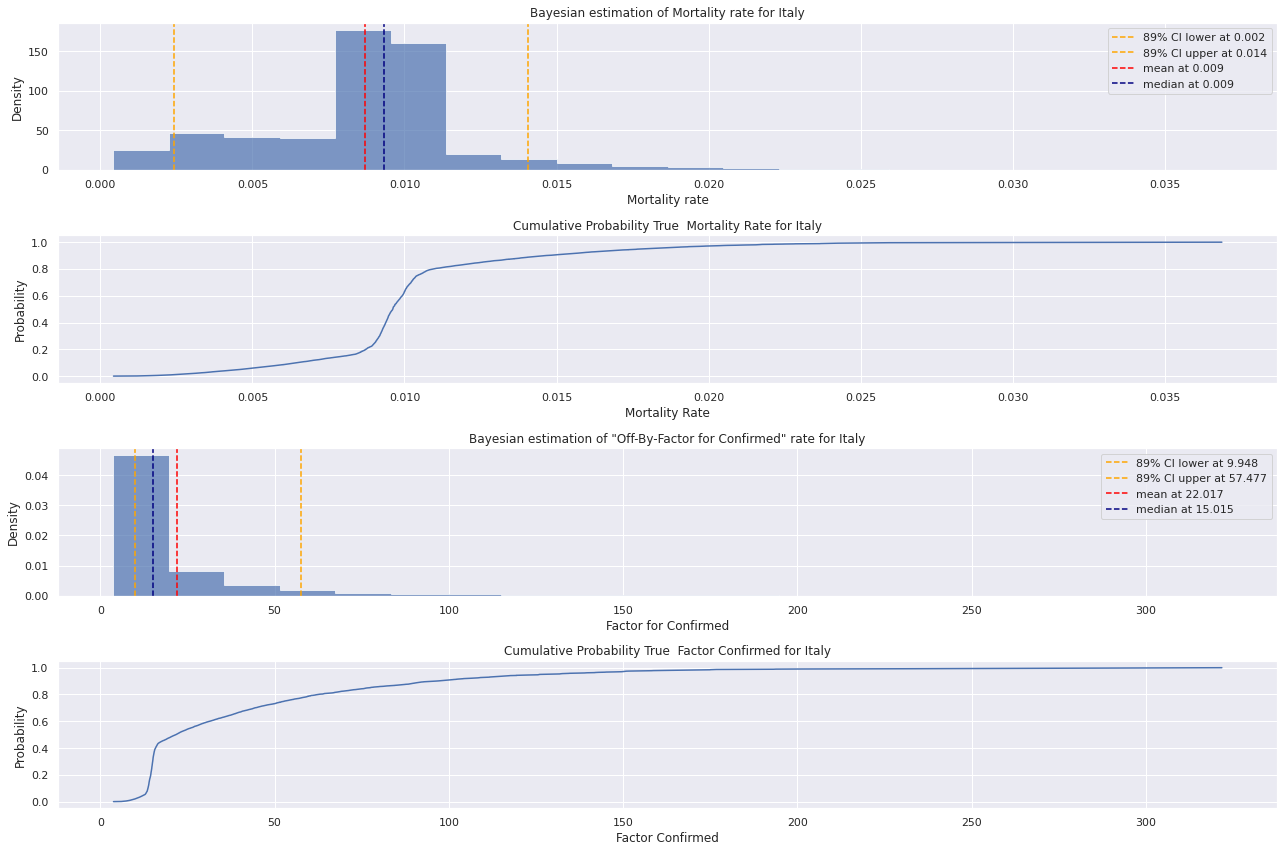

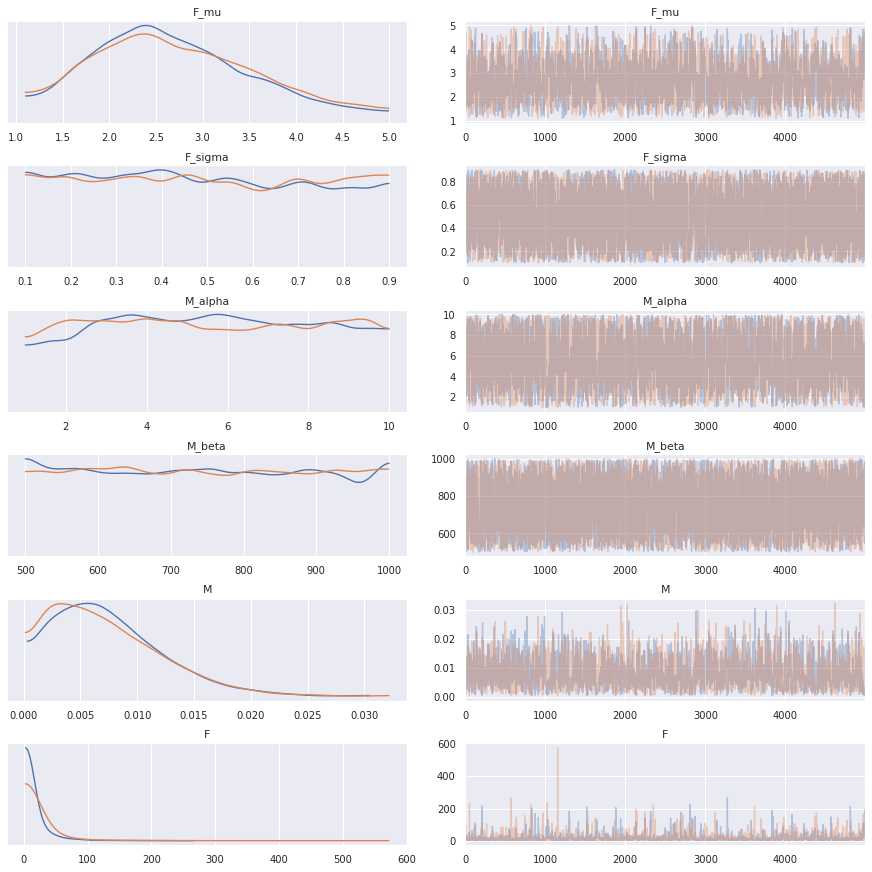

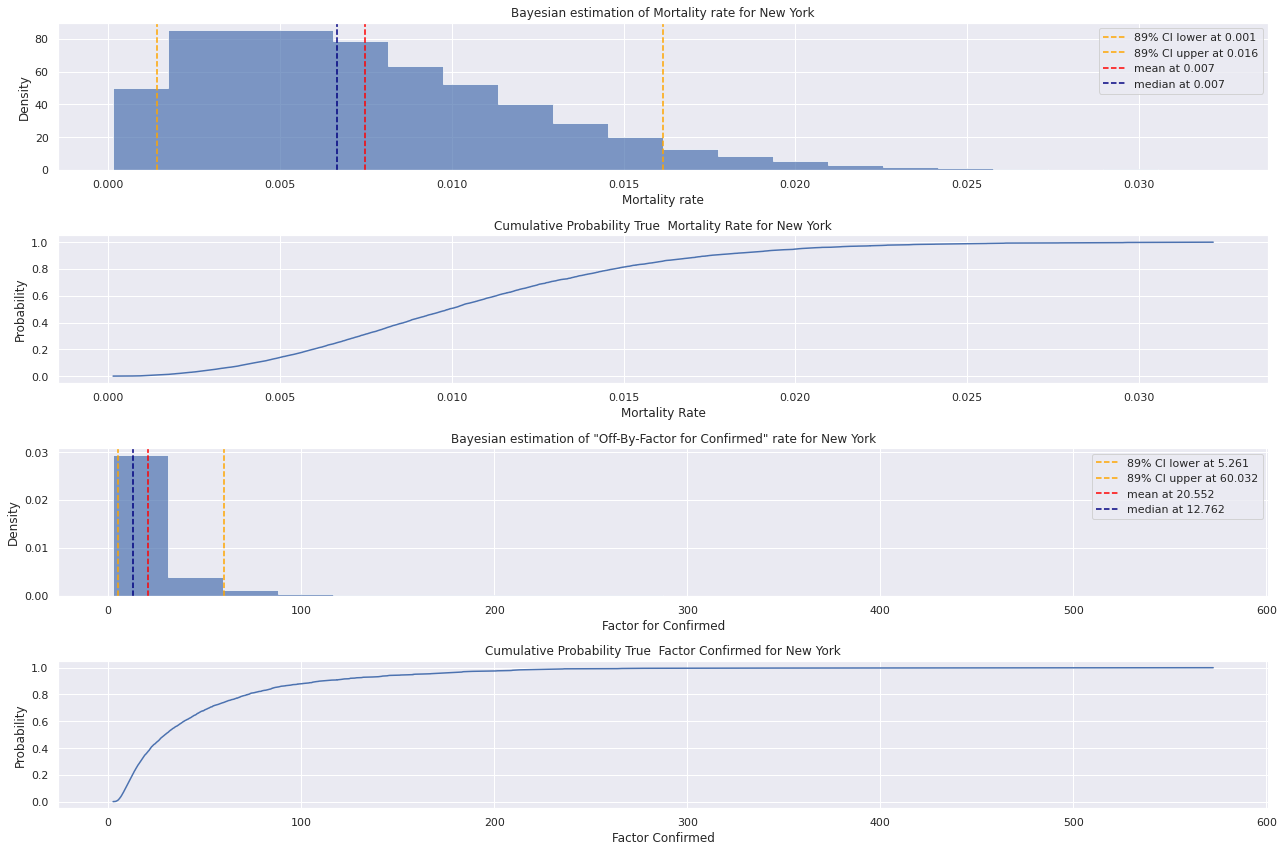

In [86]:


def process_country(country,C,D):
    df = dick[country]
    
    mask = df['confirmed'] > 500
    df = df[mask]
    mask = df['deceased'] > 5
    df = df[mask]
    mask = df['dead_inc'] >= 0 # or it crashes when doing inc  & dead_inc
    df = df[mask]
    mask = df['inc'] >= 0
    df = df[mask]
    
    #df = df.iloc[-10:] # Only the last n days
    
    print ('++++++++ {} ++++++++++'.format(country))
    print ()
    print (df.tail(40))
    print()
    
    if df.size < 1 :
        print ('Not enough data - DataFrame empty! ')
    else:
        confirmed_mean = df['confirmed'].mean()
        confirmed_std = df['confirmed'].std()
        dead_mean = df['deceased'].mean()
        dead_std = df['deceased'].std()

        #confirmed_s = (df['confirmed'] - confirmed_mean) / confirmed_std
        #dead_s = (df['deceased'] - dead_mean) / dead_std

        confirmed_s = df[C]
        dead_s = df[D]

        #plt.plot(confirmed_s,dead_s,'x--')

        #M_mu = pm.Uniform('M_mu',lower=0.1,upper=1)
        
        model = pm.Model()
        
        with model:

            F_mu = pm.Uniform('F_mu',lower=1.1,upper=5)
            F_sigma = pm.Uniform('F_sigma',lower=0.1,upper=0.9)

            M_alpha = pm.Uniform('M_alpha',lower=1,upper=10)
            M_beta = pm.Uniform ('M_beta',lower=500,upper=1000)


            M = pm.Beta('M',alpha=M_alpha,beta=M_beta)
            F = pm.Lognormal('F',mu=F_mu, sd=F_sigma) 

            gen_dead = confirmed_s.values * M  * F

            obs = pm.Poisson('obs',mu=gen_dead,observed=dead_s)

            trace = pm.sample(5000,tune=5000)

            M_alpha_post = trace['M_alpha'][:]
            M_beta_post = trace['M_beta'][:]
            F_mu_post = trace['F_mu'][:]
            F_sigma_post = trace['F_sigma'][:]
            M_post = trace['M'][:]
            F_post = trace['F'][:]


            result = pd.DataFrame({'M_alpha_post' : M_alpha_post,
                                       'M_beta_post' : M_beta_post,
                                       'F_mu_post' : F_mu_post,
                                       'F_sigma_post' : F_sigma_post,
                                       'M_post' : M_post,
                                       'F_post' : F_post})
                           
                           
        _= az.plot_trace(trace)
        print (az.summary(trace,round_to=2))


        return result
        return None

def plot(country_name,result):
    
    # For a distribution that is not severely multimodal, 
    # the HDI is the narrowest interval containing the specified mass, 
    # and the hdi function actually returns the narrowest interval.
    # HPDI does not always work properly for multimodal densities, where the HDI may be discontinuous
    
    M_low,M_high = np.percentile(result.M_post,[5.5,94.5])
    F_low,F_high = np.percentile(result.F_post,[5.5,94.5])
    
    
    plt.figure(figsize=(18,12))
    plt.subplot(411)
    plt.title('Bayesian estimation of Mortality rate for {}'.format(country_name))
    
    plt.xlabel('Mortality rate')
    plt.ylabel('Density')
    plt.axvline(M_low,color='orange',ls='dashed',label='89% CI lower at {:.3f}'.format(M_low))
    plt.axvline(M_high,color='orange',ls='dashed',label='89% CI upper at {:.3f}'.format(M_high))
    plt.axvline(result.M_post.mean(),color='red',ls='dashed',label='mean at {:.3f}'.format(result.M_post.mean()))
    plt.axvline(result.M_post.median(),color='navy',ls='dashed',label='median at {:.3f}'.format(result.M_post.median()))

    
    hist = plt.hist(result.M_post,density=True,bins=20,alpha=0.7,color='b',histtype='stepfilled')
    #plt.fill_between(x=hpdi_M,y1=0,y2=max(hist[0]),color='r',alpha=0.7,label='HPDI-50%')
    plt.legend(loc='upper right')


    plt.subplot(413)
    plt.title('Bayesian estimation of "Off-By-Factor for Confirmed" rate for {}'.format(country_name))
    plt.xlabel('Factor for Confirmed')
    plt.ylabel('Density')
    plt.axvline(F_low,color='orange',ls='dashed',label='89% CI lower at {:.3f}'.format(F_low))
    plt.axvline(F_high,color='orange',ls='dashed',label='89% CI upper at {:.3f}'.format(F_high))
    plt.axvline(result.F_post.mean(),color='red',ls='dashed',label='mean at {:.3f}'.format(result.F_post.mean()))
    plt.axvline(result.F_post.median(),color='navy',ls='dashed',label='median at {:.3f}'.format(result.F_post.median()))

    
    hist = plt.hist(result.F_post,density=True,bins=20,alpha=0.7,color='b',histtype='stepfilled')
    #plt.fill_between(x=hpdi_F,y1=0,y2=max(hist[0]),color='r',alpha=0.7,label='HPDI-50%')

    plt.legend(loc='upper right')
    
    plt.subplot(412)
    
    plt.title('Cumulative Probability True  Mortality Rate for {}'.format(c))
    M_samples = result.M_post 
    
    M_samples = np.sort(M_samples)
    
    M_dist = M_samples / M_samples.sum()
    plt.plot(M_samples,M_dist.cumsum())
    

    plt.ylabel('Probability')
    plt.xlabel('Mortality Rate')
    
    plt.subplot(414)
    
    plt.title('Cumulative Probability True  Factor Confirmed for {}'.format(c))
    F_samples = result.F_post 
    
    F_samples = np.sort(F_samples)
    
    F_dist = F_samples / F_samples.sum()
    plt.plot(F_samples,F_dist.cumsum())
    
    plt.ylabel('Probability')
    plt.xlabel('Factor Confirmed')
    
    plt.tight_layout()

    plt.savefig('Bayesian_estimate_mortality_and_factor_{}_.jpg'.format(country_name),format='jpg')

countries = ['US','Sweden','India','Germany','United Kingdom','Italy','New York']
#countries = ['Spain','Italy','New York']
#countries = ['United Kingdom','Italy','New York']

for c in countries:
    
    result = process_country(c,'inc','dead_inc')
    if not (result is None) :
        
        

        plot(c,result)
        print ()
        print (result.describe())
       

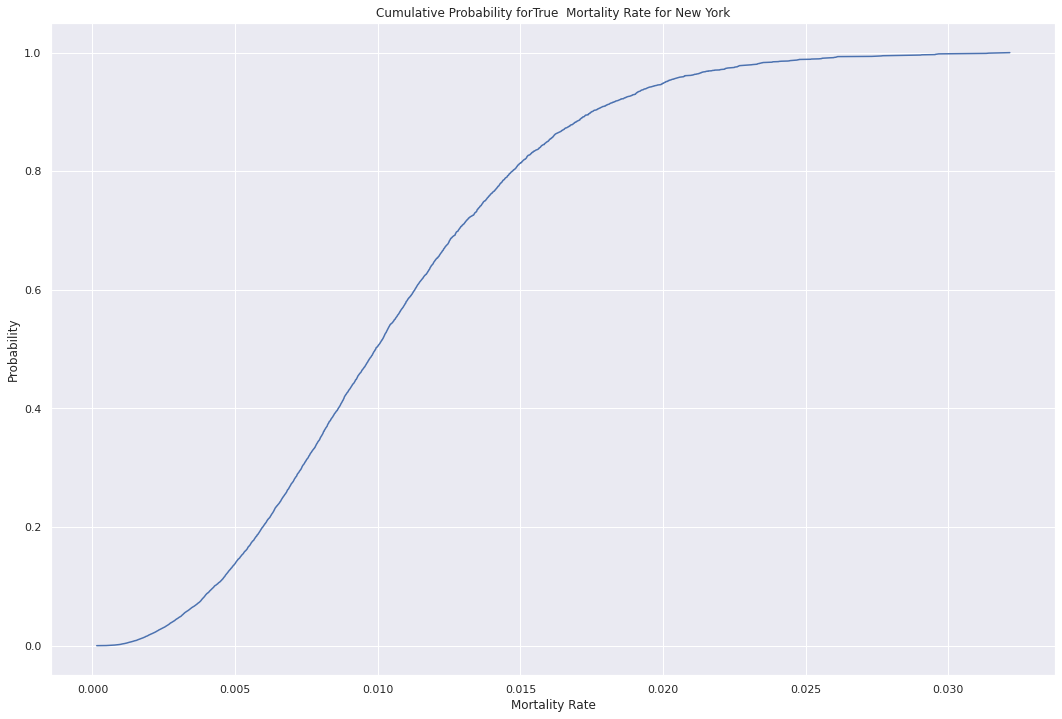

In [87]:
plt.figure(figsize=(18,12))
plt.title('Cumulative Probability forTrue  Mortality Rate for {}'.format(c))
M_samples = result.M_post 
M_samples = np.sort(M_samples)
M_dist = M_samples / M_samples.sum()
plt.plot(M_samples,M_dist.cumsum())
plt.ylabel('Probability')
plt.xlabel('Mortality Rate')
plt.savefig('Cumulative_Mortality_Rate_{}.jpg',format='jpg')

TypeError: No model on context stack, which is needed to instantiate distributions. Add variable inside a 'with model:' block, or use the '.dist' syntax for a standalone distribution.

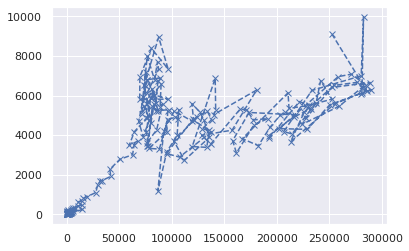

In [88]:
def process_world(df,C,D):
    
    mask = df['confirmed'] > 1000
    df = df[mask]
    mask = df['dead'] > 5
    df = df[mask]
    
    #df = df.iloc[-30:] limit number of thays
    
    confirmed_mean = df['confirmed'].mean()
    confirmed_std = df['confirmed'].std()
    dead_mean = df['dead'].mean()
    dead_std = df['dead'].std()
    
    #confirmed_s = (df['confirmed'] - confirmed_mean) / confirmed_std
    #dead_s = (df['deceased'] - dead_mean) / dead_std
    
    confirmed_s = df[C]
    dead_s = df[D]
    
    plt.plot(confirmed_s,dead_s,'x--')
    
    #F_mu = pm.Uniform('F_mu',lower=1,upper=1.2)
    #F_sigma = pm.Uniform('F_sigma',lower=0.19,upper=0.21)
    
    #F_mu = pm.Uniform('F_mu',lower=1.1,upper=2)
    #F_sigma = pm.Uniform('F_sigma',lower=0.1,upper=0.3)
    
    F_mu = pm.Uniform('F_mu',lower=1.1,upper=3)
    F_sigma = pm.Uniform('F_sigma',lower=0.1,upper=0.9)
    
    #M_alpha = pm.Uniform('M_alpha',lower=1,upper=1000)
    #M_beta = pm.Uniform ('M_beta',lower=1,upper=1000)
    
    M_alpha = pm.Uniform('M_alpha',lower=1,upper=10)
    M_beta = pm.Uniform ('M_beta',lower=500,upper=1000)
    
    M = pm.Beta('M',alpha=M_alpha,beta=M_beta)
    F = pm.Lognormal('F',mu=F_mu, tau=1 / F_sigma ** 2) #0.6 0.2
    
    
    @pm.deterministic()
    def gen_dead(confirmed_s=confirmed_s,F=F,M=M):
        return confirmed_s * F * M
    
    obs = pm.Poisson('obs',mu=gen_dead,observed=True,value=dead_s)
    
    model = pm.Model([M_alpha,M_beta,F_mu,F_sigma,M,F,gen_dead,obs])
    map_ = pm.MAP(model)
    map_.fit()
    mcmc = pm.MCMC(model)
    mcmc.sample(5000000,2000000,5)
    
    M_alpha_post = mcmc.trace('M_alpha')[:]
    M_beta_post = mcmc.trace('M_beta')[:]
    F_mu_post = mcmc.trace('F_mu')[:]
    F_sigma_post = mcmc.trace('F_sigma')[:]
    M_post = mcmc.trace('M')[:]
    F_post = mcmc.trace('F')[:]
    gen_dead_post = mcmc.trace('gen_dead')[:,0]
    
    #pmplot (M_alpha_post,'M_alpha_post')
    #pmplot(M_beta_post,'M_beta_post')
    #pmplot(F_mu_post,'F_mu_post')
    #pmplot(F_sigma_post,'F_sigma_post')
    pmplot(M_post,'M_post')
    pmplot(F_post,'F_post')
    
    result = pd.DataFrame({'M_alpha_post' : M_alpha_post,
                          'M_beta_post' : M_beta_post,
                          'F_mu_post' : F_mu_post,
                          'F_sigma_post' : F_sigma_post,
                          'M_post' : M_post,
                          'F_post' : F_post,
                          'gen_dead_post' : gen_dead_post})
    
    return result

def plot_world(result,title,official_mortality):
    
    M_low,M_high = np.percentile(result.M_post,[5.5,94.5])
    F_low,F_high = np.percentile(result.F_post,[5.5,94.5])
    
    hpdi_M = pm.utils.hpd(result.M_post, alpha=0.50)
    hpdi_F = pm.utils.hpd(result.F_post,alpha=0.50)
    
    
    plt.figure(figsize=(18,12))
    plt.subplot(411)
    plt.title('Bayesian estimation of Mortality rate for {}, official mortality {:.2f}'.format(title,official_mortality))
    plt.xlabel('Mortality rate')
    plt.ylabel('Density')
    plt.axvline(M_low,color='orange',ls='dashed',label='89% CI lower at {:.3f}'.format(M_low))
    plt.axvline(M_high,color='orange',ls='dashed',label='89% CI upper at {:.3f}'.format(M_high))
    plt.axvline(result.M_post.mean(),color='red',ls='dashed',label='mean at {:.3f}'.format(result.M_post.mean()))
    plt.axvline(result.M_post.median(),color='navy',ls='dashed',label='median at {:.3f}'.format(result.M_post.median()))

    
    plt.axvline(hpdi_M[0],color='k',label='HPDI-50% low at {:.3f}'.format(hpdi_M[0]),ls='dashed')
    plt.axvline(hpdi_M[1],color='k',ls='dashed',label='HPDI-50% high at {:.3f}'.format(hpdi_M[1]))
    
    hist = plt.hist(result.M_post,density=True,bins=10,alpha=0.7,color='b')

    plt.legend(loc='upper right')
    plt.hist(result.M_post,density=True,bins=10)

    plt.subplot(413)
    plt.title('Bayesian estimation of "Off-By-Factor for Confirmed" rate for {}'.format(title))
    plt.xlabel('Factor for Confirmed')
    plt.ylabel('Density')
    plt.axvline(F_low,color='orange',ls='dashed',label='89% CI lower at {:.3f}'.format(F_low))
    plt.axvline(F_high,color='orange',ls='dashed',label='89% CI upper at {:.3f}'.format(F_high))
    plt.axvline(result.F_post.mean(),color='red',ls='dashed',label='mean at {:.3f}'.format(result.F_post.mean()))
    plt.axvline(result.F_post.median(),color='navy',ls='dashed',label='median at {:.3f}'.format(result.F_post.median()))

    
    plt.axvline(hpdi_F[0],color='k',label='HPDI-50% low at {:.3f}'.format(hpdi_F[0]),ls='dashed')
    plt.axvline(hpdi_F[1],color='k',ls='dashed',label='HPDI-50% high at {:.3f}'.format(hpdi_F[1]))
    
    hist = plt.hist(result.F_post,density=True,bins=10,alpha=0.7,color='b')

    plt.legend(loc='upper right')
    
    plt.subplot(412)
    
    plt.title('Cumulative Probability True  Mortality Rate for {}'.format(c))
    M_samples = result.M_post 
    M_samples = np.sort(M_samples)
    M_dist = M_samples / M_samples.sum()
    plt.plot(M_samples,M_dist.cumsum())
    
    plt.axvline(hpdi_M[0],ls='dashed',color='lime')
    plt.axvline(hpdi_M[1],ls='dashed',color='lime')

    plt.ylabel('Probability')
    plt.xlabel('Mortality Rate')
    
    plt.subplot(414)
    
    plt.title('Cumulative Probability True  Factor Confirmed for {}'.format(c))
    F_samples = result.F_post 
    F_samples = np.sort(F_samples)
    F_dist = F_samples / F_samples.sum()
    plt.plot(F_samples,F_dist.cumsum())
    
    plt.axvline(hpdi_F[0],ls='dashed',color='lime')
    plt.axvline(hpdi_F[1],ls='dashed',color='lime')
    
    plt.ylabel('Probability')
    plt.xlabel('Factor Confirmed')
    
    plt.tight_layout()

    plt.savefig('Bayesian_estimate_mortality_and_factor_{}.jpg'.format(title),format='jpg')

world_df = pd.read_pickle('global_data.pkl')

result_world = process_world(world_df,'inc','dead_inc')
official_mortality = world_df.iloc[-1,6]
plot_world(result_world,'Global',official_mortality)
